Student name : Kulboboev Shukhrat

Neptun code : JDN3HW

Assignment task

## Problem 1

### Task 1 : Hypothesis Testing:
We will use Kruskal-Wallis Test becasue there is no information regarding the variance and normal distribution or not  and they are independent as well.

In [2]:

library(FSA)
library(dplyr)
library(tidyr)

# Step 1: Import the CSV file
data <- read.csv("/content/13assign1.csv", header = FALSE)

# Step 2: Assign column names (Sweet Types)
colnames(data) <- c("Chocolate", "Gummy_Candy", "Biscuit", "Ice_Cream", "Hard_Candy")

# Step 3: Reshape data into long format
data_long <- data %>%
  pivot_longer(cols = everything(),
               names_to = "Sweet_Type",
               values_to = "Sugar_Content")

# Step 4: Perform Kruskal-Wallis Test
kruskal_result <- kruskal.test(Sugar_Content ~ Sweet_Type, data = data_long)
print("Kruskal-Wallis Test Results:")
print(kruskal_result)

[1] "Kruskal-Wallis Test Results:"

	Kruskal-Wallis rank sum test

data:  Sugar_Content by Sweet_Type
Kruskal-Wallis chi-squared = 130.18, df = 4, p-value < 2.2e-16



The p-value is extremely small (
<
0.05), in the significance level 0.05 meaning it is statistically significant difference . We reject the null hypothesis (
 that all sweet categories have the same median sugar content.There is strong evidence that at least one sweet type has a different sugar content compared to the others.

### Task 2 : Post-hoc Tests:
We will proceed with Dunn's post-hoc test to identify which specific pairs of sweet categories differ significantly in their sugar content.

In [3]:
# Step 5: Perform Dunn's Post-hoc Test for pairwise comparisons
dunn_result <- dunnTest(Sugar_Content ~ Sweet_Type, data = data_long, method = "bonferroni")
print("Dunn's Pairwise Post-hoc Test Results:")
print(dunn_result)

# Step 6: Display a Summary of the Results
summary(dunn_result)

Warning message:
“Sweet_Type was coerced to a factor.”


[1] "Dunn's Pairwise Post-hoc Test Results:"


Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Bonferroni method.




                 Comparison         Z      P.unadj        P.adj
1       Biscuit - Chocolate -1.605593 1.083634e-01 1.000000e+00
2     Biscuit - Gummy_Candy -5.338328 9.380784e-08 9.380784e-07
3   Chocolate - Gummy_Candy -3.732735 1.894120e-04 1.894120e-03
4      Biscuit - Hard_Candy  1.686141 9.176865e-02 9.176865e-01
5    Chocolate - Hard_Candy  3.291734 9.957183e-04 9.957183e-03
6  Gummy_Candy - Hard_Candy  7.024469 2.148826e-12 2.148826e-11
7       Biscuit - Ice_Cream -8.213896 2.141250e-16 2.141250e-15
8     Chocolate - Ice_Cream -6.608303 3.887499e-11 3.887499e-10
9   Gummy_Candy - Ice_Cream -2.875568 4.033008e-03 4.033008e-02
10   Hard_Candy - Ice_Cream -9.900037 4.161212e-23 4.161212e-22


       Length Class      Mode     
method  1     -none-     character
res     4     data.frame list     
dtres  25     -none-     character

We implemented Dunn's Post-hoc Test for pairwise comparisons and we found that in adjusted p value there are most of pairs showed significant difference. Only Biscuit - Chocolate and Biscuit - Hard Candy showed no significant diffrenece with p value greater than 0.05

##  Problem 2 : Linear  regression

## Task 1

### Point Estimation of Coefficients

First, load the data and fit a linear regression model using lm()function.

In [55]:

library(tidyverse)

# Load the dataset
data <- read.csv("/content/13assign2.csv")

# Inspect the first few rows of the data
head(data)

# Fit the linear regression model
model <- lm(Y ~ X_1 + X_2, data = data)

# Summary of the model to get coefficient estimates and diagnostics
summary(model)


,Y,X_1,X_2
,<dbl>,<dbl>,<dbl>
1,0.00,3.75,9.70
2,9.52,9.51,7.75
3,1.48,7.32,9.39
4,0.00,5.99,8.95
5,0.00,1.56,5.98
6,0.00,1.56,9.22



Call:
lm(formula = Y ~ X_1 + X_2, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3766 -1.6977 -0.1641  1.3111  3.0614 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.43765    0.57969   4.205 0.000116 ***
X_1          1.09925    0.08444  13.018  < 2e-16 ***
X_2         -0.77172    0.07951  -9.706 8.31e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.704 on 47 degrees of freedom
Multiple R-squared:  0.8412,	Adjusted R-squared:  0.8344 
F-statistic: 124.5 on 2 and 47 DF,  p-value: < 2.2e-16


In [56]:
# Standardize the data
data_scaled <- data %>%
  mutate(X1_scaled = scale(X_1), X2_scaled = scale(X_2))

# Fit the linear model with standardized data
model_scaled <- lm(Y ~ X1_scaled + X2_scaled, data = data_scaled)

# Summary of the standardized model
summary(model_scaled)



Call:
lm(formula = Y ~ X1_scaled + X2_scaled, data = data_scaled)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3766 -1.6977 -0.1641  1.3111  3.0614 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.5236     0.2410  14.619  < 2e-16 ***
X1_scaled     3.1756     0.2439  13.018  < 2e-16 ***
X2_scaled    -2.3677     0.2439  -9.706 8.31e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.704 on 47 degrees of freedom
Multiple R-squared:  0.8412,	Adjusted R-squared:  0.8344 
F-statistic: 124.5 on 2 and 47 DF,  p-value: < 2.2e-16


### Prediction, Confidence Intervals for Coefficients ,Prediction Interval

In [58]:
# New data for prediction
new_data <- data.frame(X_1 = 450, X_2 = 30)

# Make the prediction
predicted_value <- predict(model, new_data)

# Display the predicted popularity score
predicted_value

# Compute 95% confidence intervals for the coefficients
confint(model, level = 0.95)

# Compute the 95% prediction interval
prediction_interval <- predict(model, new_data, interval = "prediction", level = 0.95)

# Display the prediction interval
prediction_interval


1 
473.9481

,2.5 %,97.5 %
(Intercept),1.2714577,3.603848
X_1,0.9293740,1.269123
X_2,-0.9316661,-0.611764


,fit,lwr,upr
1,473.9481,398.3256,549.5705


we can see here in the result part that predcition interval can be between 398.3256 and 549.5705 in the 95% prediction interval with exact predicted value equal to 473.94807

## Task 2 : Goodness-of-Fit Diagnostics

In [59]:
# Summary of the model to get R-squared and Adjusted R-squared
summary(model)

# Extracting the R-squared and Adjusted R-squared values from the model summary
r_squared <- summary(model)$r.squared
adj_r_squared <- summary(model)$adj.r.squared

# Display R-squared and Adjusted R-squared
cat("R-squared: ", r_squared, "\n")
cat("Adjusted R-squared: ", adj_r_squared, "\n")



Call:
lm(formula = Y ~ X_1 + X_2, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3766 -1.6977 -0.1641  1.3111  3.0614 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.43765    0.57969   4.205 0.000116 ***
X_1          1.09925    0.08444  13.018  < 2e-16 ***
X_2         -0.77172    0.07951  -9.706 8.31e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.704 on 47 degrees of freedom
Multiple R-squared:  0.8412,	Adjusted R-squared:  0.8344 
F-statistic: 124.5 on 2 and 47 DF,  p-value: < 2.2e-16


R-squared:  0.8411821 
Adjusted R-squared:  0.8344239 


indicates that approximately 84.12% of the variation in
𝑌
is explained by the two predictors
𝑋
1
X
1
 This is a relatively high value, suggesting that the model explains most of the variability in the data.Adjusted R-squared takes into account the number of predictors in the model and adjusts for overfitting. This value is close to the Multiple R-squared, indicating that the model does not suffer from overfitting.

### Task 3 Model Diagnostics

In [60]:
# Display the summary of the model
summary(model)
# The overall significance test is part of the F-statistic displayed in the summary

# Extracting the coefficients and p-values
coef_summary <- summary(model)$coefficients
coef_summary

# Install and load the car package for vif function (if not already installed)
library(car)
model <- lm(Y ~ X_1 + X_2, data = data)
# Compute Variance Inflation Factor (VIF)
vif(model)



Call:
lm(formula = Y ~ X_1 + X_2, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3766 -1.6977 -0.1641  1.3111  3.0614 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.43765    0.57969   4.205 0.000116 ***
X_1          1.09925    0.08444  13.018  < 2e-16 ***
X_2         -0.77172    0.07951  -9.706 8.31e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.704 on 47 degrees of freedom
Multiple R-squared:  0.8412,	Adjusted R-squared:  0.8344 
F-statistic: 124.5 on 2 and 47 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.4376529,0.57969462,4.205064,1.161246e-04
X_1,1.0992486,0.08444160,13.017856,3.365260e-17
X_2,-0.7717151,0.07950878,-9.706036,8.314129e-13


X_1      X_2 
1.003873 1.003873

The model fits the data well, explaining 84.12% of the variability in
𝑌
. Both predictors
𝑋
1
X
2
​
are highly significant and contribute meaningfully to the model.The model seems to be a good fit based on statistical measures (such as R-squared, Adjusted R-squared, and p-values), and it provides a solid basis for making predictions about
𝑌

If the VIF values for X_1 and X_2 are both approximately 1.0039, we can conclude:
Low Multicollinearity: The predictors are independent enough to be included in the regression model without multicollinearity concerns.
 The linear regression assumptions regarding predictor independence are satisfied.

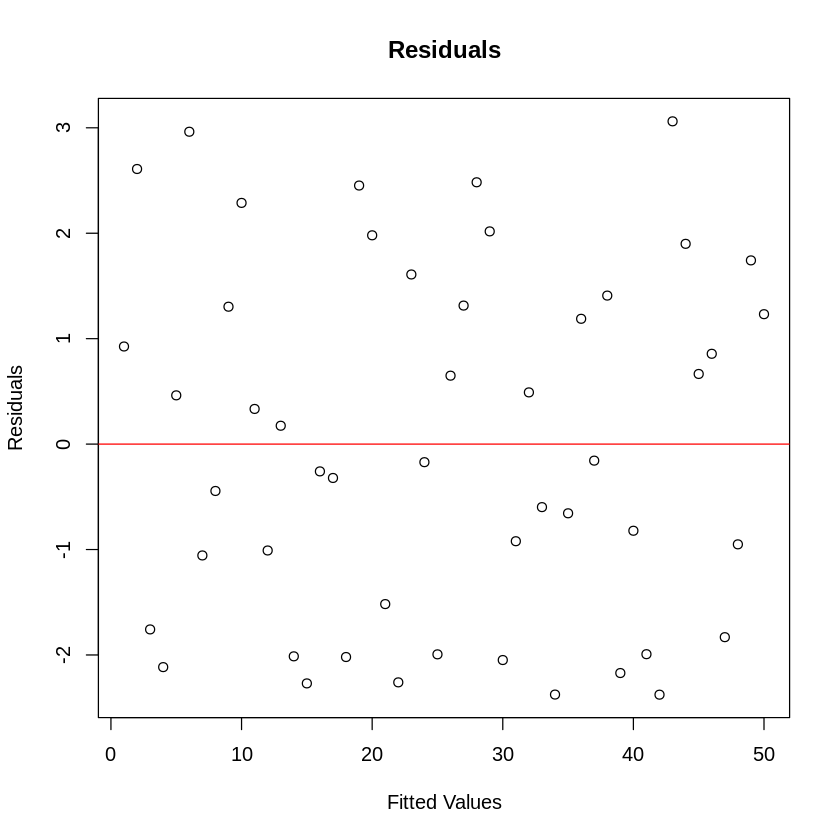


	Shapiro-Wilk normality test

data:  model$residuals
W = 0.93881, p-value = 0.0121



	Durbin-Watson test

data:  model
DW = 1.7336, p-value = 0.1642
alternative hypothesis: true autocorrelation is greater than 0


[1] 2.786077

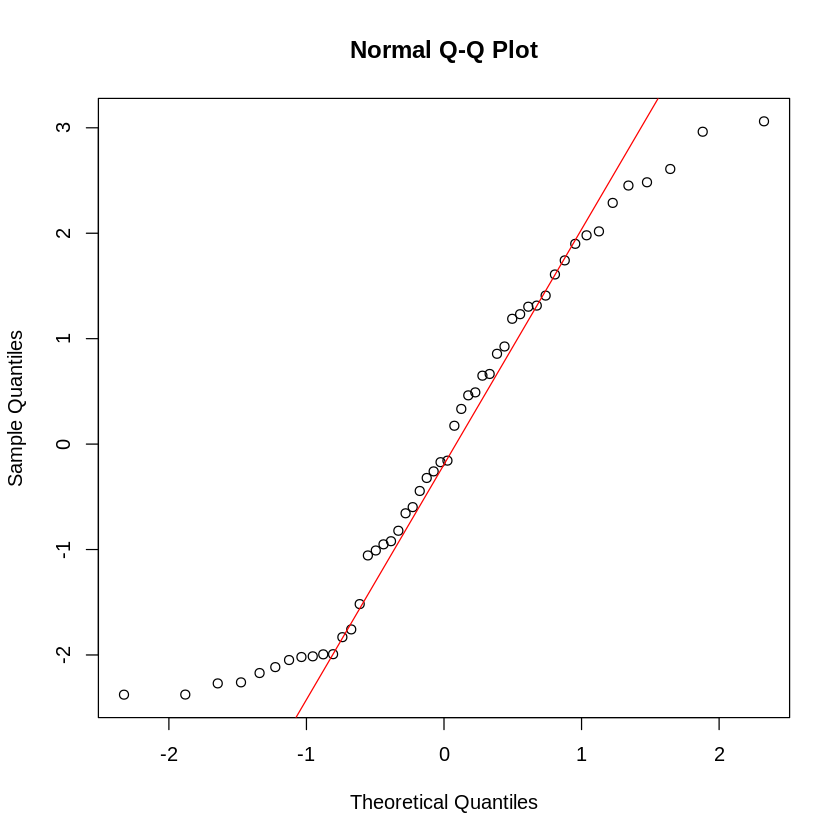

In [62]:
library(zoo)
# Plot residuals to check the expected value (zero mean)
plot(model$residuals, main = "Residuals", ylab = "Residuals", xlab = "Fitted Values")
abline(h = 0, col = "red")

# Q-Q plot to check normality
qqnorm(model$residuals)
qqline(model$residuals, col = "red")

# Shapiro-Wilk test for normality
shapiro.test(model$residuals)

# Independence of Residuals
library(lmtest)
dwtest(model)

# Estimate Variance of Residuals
var(residuals(model))


We can see here significant correlation  and normalyy disributed in this case according to p and H0 hyposesis in Shapiro test above.Then estimated variance  provides the variance estimate for the residuals equal to 2.7860766950539 in this case.In Durbin-watson test for a p-value(0.1642) > 0.05 suggests no significant autocorrelation.

## 3. Problem

 ### Task 1

A deterministic model is typically a simple linear regression model, where we predict sales (y) based on time (t)


Call:
lm(formula = value ~ time, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3679 -0.3963 -0.1141  0.4112  1.4651 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.150784   0.175389   -0.86    0.394
time         0.001137   0.005986    0.19    0.850

Residual standard error: 0.6108 on 48 degrees of freedom
Multiple R-squared:  0.0007506,	Adjusted R-squared:  -0.02007 
F-statistic: 0.03605 on 1 and 48 DF,  p-value: 0.8502


`geom_smooth()` using formula = 'y ~ x'


          fit        lwr       upr
1 -0.09281633 -0.4454588 0.2598262
2 -0.09167971 -0.4548451 0.2714857
3 -0.09054310 -0.4643227 0.2832365


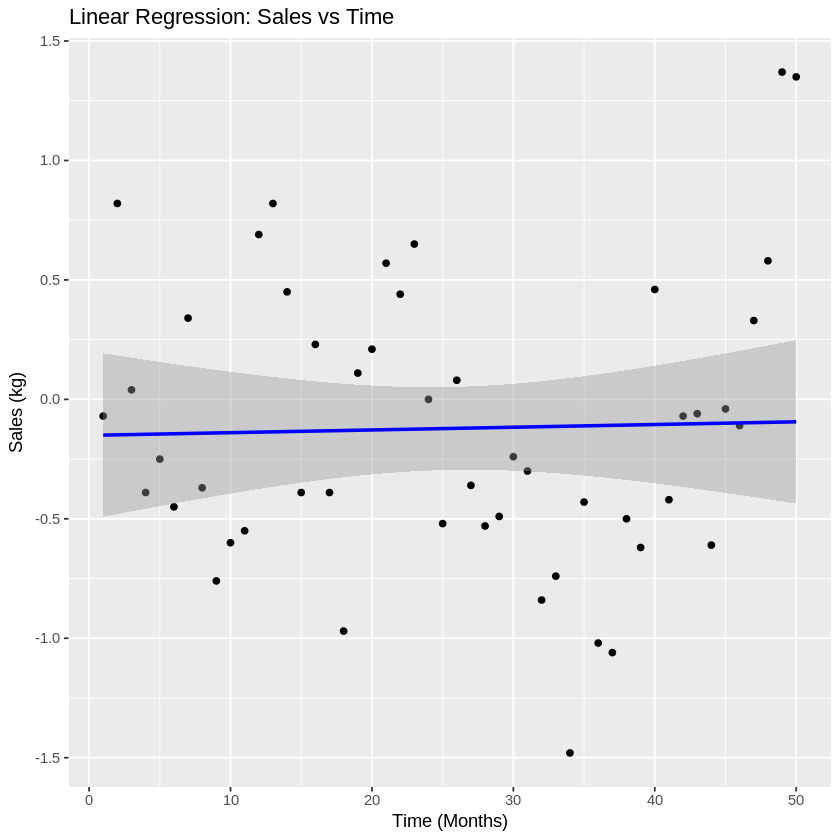

In [28]:
# Load required libraries
library(ggplot2)

# Load your data
data <- read.csv("/content/13assign3.csv")
# Fit a linear regression model
model_linear <- lm(value ~ time, data = data)

# Summary of the model
summary(model_linear)

# Plotting the data and fitted regression line
ggplot(data, aes(x = time, y = value)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  labs(title = "Linear Regression: Sales vs Time", x = "Time (Months)", y = "Sales (kg)")

# Predictions for the next few months (e.g., months 51, 52, 53)
future_months <- data.frame(time = c(51, 52, 53))
predictions <- predict(model_linear, newdata = future_months, interval = "confidence")

# Display predictions
print(predictions)



 The model has very poor fit (low R-squared, negative adjusted R-squared, and large p-values), meaning that the predictor (time) does not explain much of the variance in sales (value) in the confidence level 0.95.Both the intercept and the time coefficient are not statistically significant, suggesting that there is no meaningful linear relationship between time and sales in the dataset

### Task 2

Exponential smoothing is useful for time series forecasting, and it gives greater weight to more recent observations. We will apply Simple Exponential Smoothing (SES).


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
ses(y = sales_ts, alpha = 0.2)

  Smoothing parameters:
    alpha = 0.2 

  Initial states:
    l = 0.0032 

  sigma:  0.5734

     AIC     AICc      BIC 
141.9493 142.2046 145.7733 

Error measures:
                     ME     RMSE       MAE MPE MAPE      MASE      ACF1
Training set 0.04850399 0.561851 0.4672772 Inf  Inf 0.5928725 0.3850642

Forecasts:
      Point Forecast      Lo 80    Hi 80      Lo 95    Hi 95
Mar 5      0.4882087 -0.2466801 1.223097 -0.6357068 1.612124
Apr 5      0.4882087 -0.2612338 1.237651 -0.6579647 1.634382
May 5      0.4882087 -0.2755102 1.251928 -0.6797985 1.656216
Jun 5      0.4882087 -0.2895245 1.265942 -0.7012316 1.677649
Jul 5      0.4882087 -0.3032908 1.279708 -0.7222853 1.698703
Aug 5      0.4882087 -0.3168217 1.293239 -0.7429790 1.719396
Sep 5      0.4882087 -0.3301289 1.306546 -0.7633306 1.739748
Oct 5      0.4882087 -0.3432231 1.319640 -0.7833565 

      Point Forecast      Lo 80    Hi 80      Lo 95    Hi 95
Mar 5      0.4882087 -0.2466801 1.223097 -0.6357068 1.612124
Apr 5      0.4882087 -0.2612338 1.237651 -0.6579647 1.634382
May 5      0.4882087 -0.2755102 1.251928 -0.6797985 1.656216
Jun 5      0.4882087 -0.2895245 1.265942 -0.7012316 1.677649
Jul 5      0.4882087 -0.3032908 1.279708 -0.7222853 1.698703
Aug 5      0.4882087 -0.3168217 1.293239 -0.7429790 1.719396


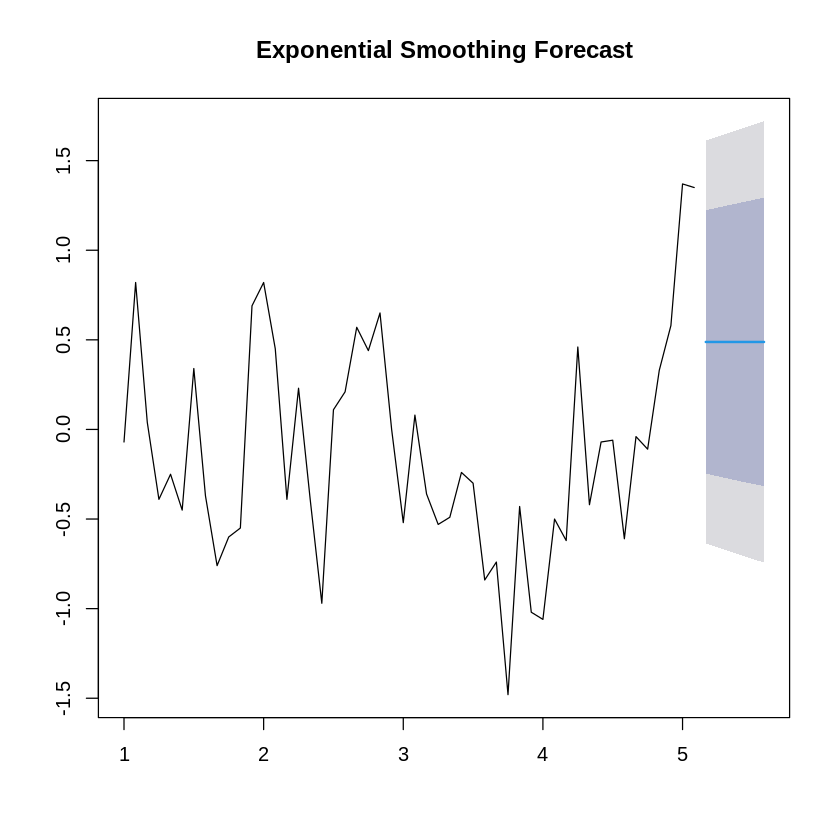

In [41]:
# Load required library
library(forecast)

# Assuming the 'sales' column contains the time series data
sales_ts <- ts(data$value, frequency = 12)  # Assuming monthly data with a frequency of 12

# Apply simple exponential smoothing
model_ses <- ses(sales_ts, alpha = 0.2)  # You can tune alpha

# Summary of the model
summary(model_ses)

# Forecast for the next few months
forecast_ses <- forecast(model_ses, h = 6)  # Forecasting next 6 months

# Plotting the forecast
plot(forecast_ses, main = "Exponential Smoothing Forecast")

# Display the forecast values
print(forecast_ses)


We forecasted the next three months sales value.The 80% and 95% intervals give us the range within which we expect the true values to fall with a certain level of confidence. These intervals widen as we move further into the future, which is expected, as forecasts become less accurate further from the training data.Both RMSE and MAE indicate that the model provides reasonable accuracy, though it could be improved for more precise forecasting in ARIMA algorithms

### Task 3

The ARIMA (AutoRegressive Integrated Moving Average) model is a widely used time series forecasting method. We will apply the ARIMA model and test its fit.

Series: sales_ts 
ARIMA(1,0,0) with zero mean 

Coefficients:
         ar1
      0.5844
s.e.  0.1198

sigma^2 = 0.2582:  log likelihood = -36.8
AIC=77.6   AICc=77.85   BIC=81.42

Training set error measures:
                      ME      RMSE       MAE MPE MAPE      MASE       ACF1
Training set -0.03457185 0.5030014 0.4257903 Inf  Inf 0.5402348 -0.0624573


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with zero mean
Q* = 15.941, df = 9, p-value = 0.06812

Model df: 1.   Total lags used: 10



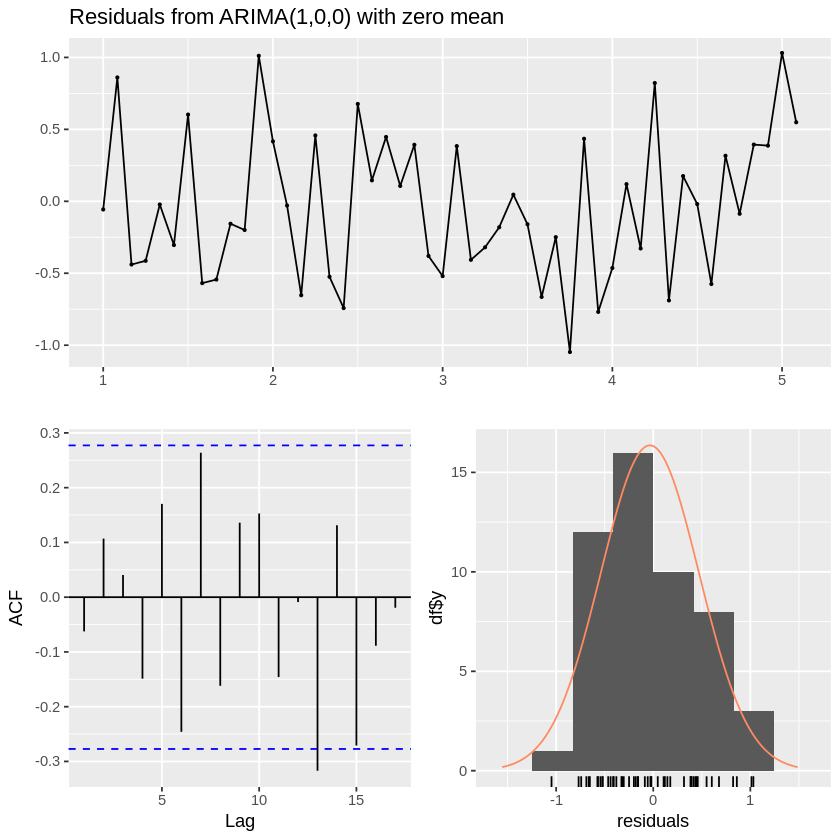

      Point Forecast      Lo 80     Hi 80      Lo 95    Hi 95
Mar 5    0.788989384  0.1378226 1.4401561 -0.2068842 1.784863
Apr 5    0.461114258 -0.2931061 1.2153346 -0.6923663 1.614595
May 5    0.269492040 -0.5168396 1.0558237 -0.9330985 1.472083
Jun 5    0.157501007 -0.6395024 0.9545044 -1.0614105 1.376413
Jul 5    0.092049350 -0.7085666 0.8926653 -1.1323871 1.316486
Aug 5    0.053797007 -0.7480491 0.8556431 -1.1725208 1.280115
Sep 5    0.031440939 -0.7708249 0.8337068 -1.1955189 1.258401
Oct 5    0.018375235 -0.7840340 0.8207844 -1.2088038 1.245554
Nov 5    0.010739159 -0.7917190 0.8131973 -1.2165147 1.237993
Dec 5    0.006276358 -0.7961985 0.8087512 -1.2210031 1.233556
Jan 6    0.003668133 -0.7988125 0.8061487 -1.2236200 1.230956
Feb 6    0.002143791 -0.8003387 0.8046263 -1.2251473 1.229435


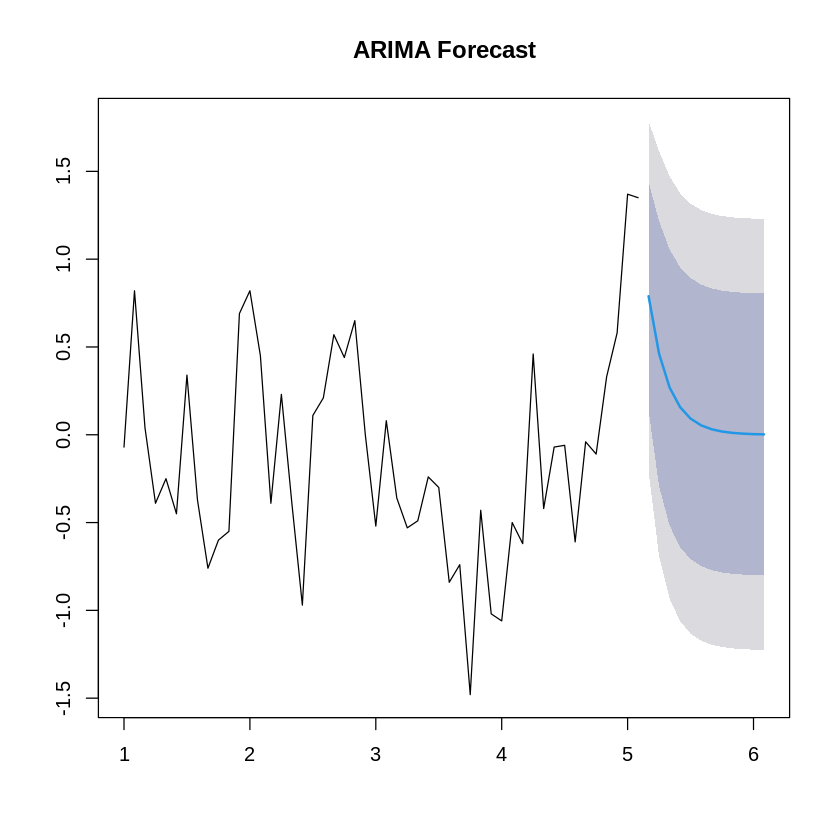

In [36]:
# Load required library
library(forecast)

# Fit an ARIMA model
model_arima <- auto.arima(sales_ts)

# Summary of the ARIMA model
summary(model_arima)

# Diagnostics of the ARIMA model
checkresiduals(model_arima)

# Forecast for the next few months
forecast_arima <- forecast(model_arima, h = 12)  # Forecasting next 12 months

# Plotting the forecast
plot(forecast_arima, main = "ARIMA Forecast")

# Display the forecast values
print(forecast_arima)



The AIC of 77.6, AICc of 77.85, and BIC of 81.42 suggest a reasonable fit.The ARIMA(1,0,0) model fits the data reasonably well. According to results , we can see that future values of sales will decrease considerably